In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df=pd.read_csv('canada_per_capita_income.csv')
print(df)

    year  per capita income (US$)
0   1970              3399.299037
1   1971              3768.297935
2   1972              4251.175484
3   1973              4804.463248
4   1974              5576.514583
5   1975              5998.144346
6   1976              7062.131392
7   1977              7100.126170
8   1978              7247.967035
9   1979              7602.912681
10  1980              8355.968120
11  1981              9434.390652
12  1982              9619.438377
13  1983             10416.536590
14  1984             10790.328720
15  1985             11018.955850
16  1986             11482.891530
17  1987             12974.806620
18  1988             15080.283450
19  1989             16426.725480
20  1990             16838.673200
21  1991             17266.097690
22  1992             16412.083090
23  1993             15875.586730
24  1994             15755.820270
25  1995             16369.317250
26  1996             16699.826680
27  1997             17310.757750
28  1998      

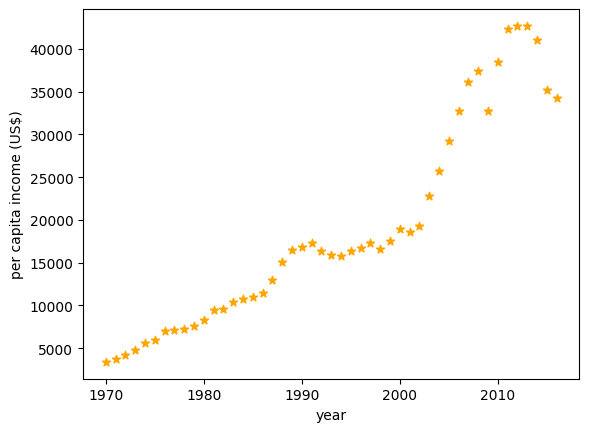

In [6]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color='orange', marker='*')


In [7]:
line=linear_model.LinearRegression()
X = df['year'].values.reshape(-1, 1)
y = df['per capita income (US$)'].values
line = linear_model.LinearRegression()
line.fit(X, y)

LinearRegression()

In [10]:
predicted_value = line.predict(np.array([[1985]]))
print(predicted_value)

[12292.41646162]


In [11]:
print(line.coef_)
print(line.intercept_)

[828.46507522]
-1632210.7578554575


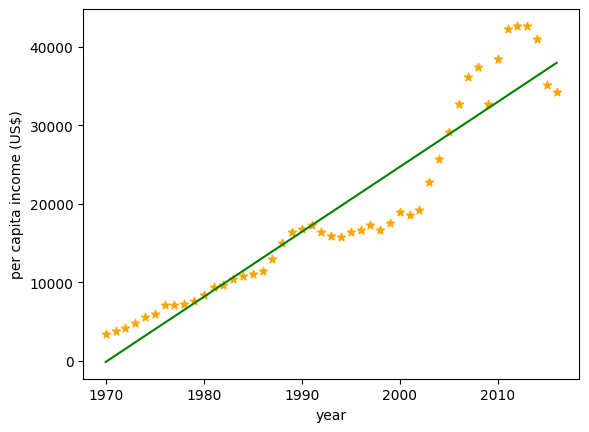

In [13]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'], df['per capita income (US$)'], color='orange', marker='*')
plt.plot(df['year'], line.predict(df['year'].values.reshape(-1, 1)), color='green')



In [14]:
!pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5588 sha256=eab78255ad326926ad884ffb165a01ec0d45b1fc6c01a3a747940316cdbe0524
  Stored in directory: c:\users\ratna\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [25]:
df2=pd.read_csv('hiring.csv')
print(df2)

  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [29]:
import pandas as pd
column_change = 'experience'
df2[column_change] = df2[column_change].fillna('')
def convert_to_number(value):
    try:
        if isinstance(value, (int, float)):
            return int(value)
        return int(value)
    except ValueError as e:
        print(f"Error converting '{value}' to a number. Details: {e}")
        return 0 
df2[column_change] = df2[column_change].apply(convert_to_number)
print(df2)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000


In [51]:
import math
mid=df2['test_score(out of 10)'].median()
df2['test_score(out of 10)']=(df2['test_score(out of 10)'].fillna(mid)).apply(math.floor)
print(df2)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                      8                           9      50000
1           0                      8                           6      45000
2           5                      6                           7      60000
3           2                     10                          10      65000
4           7                      9                           6      70000
5           3                      7                          10      62000
6          10                      8                           7      72000
7          11                      7                           8      80000


In [47]:
line2=linear_model.LinearRegression()
a=df2['experience'].values.reshape(-1,1)
b=df2['test_score(out of 10)'].values.reshape(-1,1)
c=df2['interview_score(out of 10)'].values.reshape(-1,1)
d=df2['salary($)'].values
X = pd.concat([pd.Series(a.flatten()), pd.Series(b.flatten()), pd.Series(c.flatten())], axis=1).values
y=d
line2.fit(X,y)

LinearRegression()

In [48]:
print(line2.coef_)
print(line2.intercept_)

[2812.95487627 1845.70596798 2205.24017467]
17737.26346433768


In [49]:
print(line2.predict([[2,9,6]]))
print(line2.predict([[10,10,10]]))

[53205.96797671]
[86376.27365357]


In [2]:
df3=pd.read_csv('test_scores.csv')
print(df3)

     name  math  cs
0   david    92  98
1   laura    56  68
2  sanjay    88  81
3     wei    70  80
4    jeff    80  83
5   aamir    49  52
6  venkat    65  66
7   virat    35  30
8  arthur    66  68
9    paul    67  73


In [14]:
import numpy as np
x = np.array(df3['math'])
y = np.array(df3['cs'])
def grad(x, y):
    m_curr = 0
    b_curr = 0
    lr = 0.01
    n = len(x)
    iterations = 1000
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - lr * md
        b_curr = b_curr - lr * bd
        print("m {}, b {}, cost {} iteration {}".format(m_curr, b_curr, cost, i))
grad(x, y)


m 98.918, b 1.3980000000000001, cost 5199.1 iteration 0
m -9169.587968000002, b -129.386408, cost 45366108.340850405 iteration 1
m 859278.7790833284, b 12125.168845408005, cost 398290329619.79004 iteration 2
m -80513336.3321037, b -1136112.3853868274, cost 3496779946139640.5 iteration 3
m 7544007292.656351, b 106452428.60001147, cost 3.0699891720627802e+19 iteration 4
m -706864823521.7386, b -9974470361.562872, cost 2.6952892837845242e+23 iteration 5
m 66232422560018.44, b 934596423272.1094, cost 2.3663224578744982e+27 iteration 6
m -6205901966243919.0, b -87570612045376.58, cost 2.077506859218773e+31 iteration 7
m 5.814858905354231e+17, b 8205265827097408.0, cost 1.8239419296970382e+35 iteration 8
m -5.448456046050343e+19, b -7.688239892447695e+17, cost 1.6013252366146002e+39 iteration 9
m 5.105140772789593e+21, b 7.203792526577272e+19, cost 1.4058794699920812e+43 iteration 10
m -4.783458302630841e+23, b -6.74987090568644e+21, cost 1.2342883500192473e+47 iteration 11
m 4.4820455206575

C:\Users\ratna\AppData\Local\Temp\ipykernel_17844\1353043702.py:12: RuntimeWarning: overflow encountered in scalar add
  cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
C:\Users\ratna\AppData\Local\Temp\ipykernel_17844\1353043702.py:12: RuntimeWarning: overflow encountered in scalar power
  cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
C:\Users\ratna\AppData\Local\Temp\ipykernel_17844\1353043702.py:13: RuntimeWarning: overflow encountered in scalar add
  md = -(2/n) * sum(x * (y - y_predicted))
C:\Users\ratna\AppData\Local\Temp\ipykernel_17844\1353043702.py:15: RuntimeWarning: invalid value encountered in scalar subtract
  m_curr = m_curr - lr * md


In [13]:
df4=pd.read_csv('carprices.csv')
print(df4)

                Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5


In [16]:
dummy=pd.get_dummies(df4['Car Model'])
merged=pd.concat([df4,dummy],axis=1)
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [20]:
final=merged.drop(['Car Model','Mercedez Benz C class'],axis=1)
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [26]:
line3=linear_model.LinearRegression()
a=final['Mileage'].values.reshape(-1,1)
b=final['Age(yrs)'].values.reshape(-1,1)
c=final['Audi A5'].values.reshape(-1,1)
d=final['BMW X5'].values.reshape(-1,1)
X=pd.concat([pd.Series(a.flatten()),pd.Series(b.flatten()),pd.Series(c.flatten()),pd.Series(d.flatten())],axis=1)
y=final['Sell Price($)'].values
line3.fit(X,y)

LinearRegression()

In [27]:
print(line3.coef_)
print(line3.intercept_)

[-3.70122094e-01 -1.33245363e+03 -2.45354074e+03 -6.73820733e+03]
58976.62596853723


In [29]:
print(line3.predict([[45000,4,0,0]]))

[36991.31721061]


In [31]:
print(line3.predict([[86000,7,0,1]]))

[11080.74313219]


In [32]:
print(line3.score(X,y))

0.9417050937281083


In [2]:
df5=pd.read_csv('HR_comma_sep.csv')
df5

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<AxesSubplot: xlabel='left'>

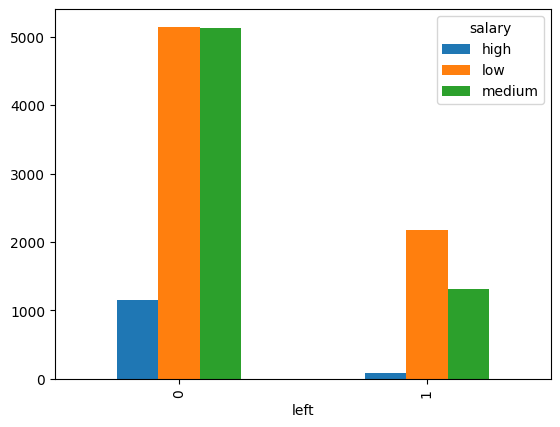

In [5]:
pd.crosstab(df5.left,df5.salary).plot(kind='bar')

<AxesSubplot: xlabel='left'>

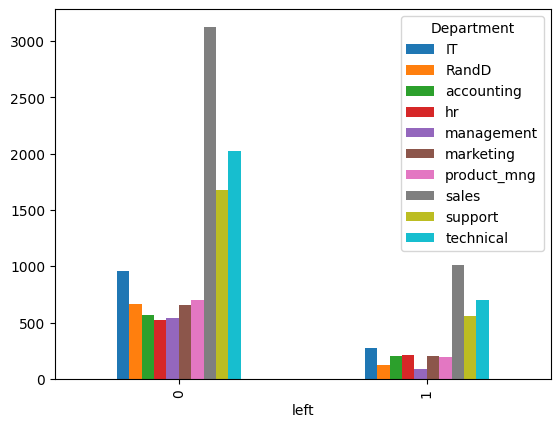

In [6]:
pd.crosstab(df5.left,df5.Department).plot(kind='bar')

In [20]:
subdf=df5[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [21]:
dummy=pd.get_dummies(subdf['salary'])
dummy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [22]:
merge=pd.concat([subdf,dummy],axis=1)
merge

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,high,low,medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0,1,0
14995,0.37,160,0,low,1,0,1,0
14996,0.37,143,0,low,1,0,1,0
14997,0.11,280,0,low,1,0,1,0


In [23]:
new=merge.drop(['salary','medium'],axis=1)
new

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low
0,0.38,157,0,1,0,1
1,0.80,262,0,1,0,0
2,0.11,272,0,1,0,0
3,0.72,223,0,1,0,1
4,0.37,159,0,1,0,1
...,...,...,...,...,...,...
14994,0.40,151,0,1,0,1
14995,0.37,160,0,1,0,1
14996,0.37,143,0,1,0,1
14997,0.11,280,0,1,0,1


In [19]:
from sklearn.model_selection import train_test_split

In [55]:
a=new['satisfaction_level'].values.reshape(-1,1)
b=new['average_montly_hours'].values.reshape(-1,1)
c=new['promotion_last_5years'].values.reshape(-1,1)
d=new['high'].values.reshape(-1,1)
e=new['low'].values.reshape(-1,1)
X=pd.concat([pd.Series(a.flatten()),pd.Series(b.flatten()),pd.Series(c.flatten()),pd.Series(d.flatten()),pd.Series(e.flatten())],axis=1)
y=new['left'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train


,0,1,2,3,4
9409,0.63,265,0,0,1
13963,0.78,209,0,0,0
5028,0.64,180,0,0,0
3403,0.62,231,0,0,1
3206,0.40,280,0,0,1
...,...,...,...,...,...
3495,0.66,186,0,0,0
11622,0.70,225,0,0,0
8264,0.84,234,0,0,0
3166,0.61,112,0,0,1


In [56]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [57]:
log.fit(X_train,y_train)

LogisticRegression()

In [58]:
log.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
log.predict([[0.75,200,1,0,0]])

array([0], dtype=int64)

In [60]:
log.score(X_test,y_test)

0.7893333333333333

In [16]:
df6=pd.read_csv('titanic.csv')
df6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df6=df6.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
df6

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [19]:
dummy=pd.get_dummies(df6['Sex'])
dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
final=pd.concat([df6,dummy],axis=1)
final

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,NaN,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [36]:
import math
mid=final['Age'].median()
final['Age']=(final['Age'].fillna(mid)).apply(math.floor)
final

,Survived,Pclass,Sex,Age,Fare,female,male,Age)
0,0,3,male,22,7.2500,0,1,22
1,1,1,female,38,71.2833,1,0,38
2,1,3,female,26,7.9250,1,0,26
3,1,1,female,35,53.1000,1,0,35
4,0,3,male,35,8.0500,0,1,35
...,...,...,...,...,...,...,...,...
886,0,2,male,27,13.0000,0,1,27
887,1,1,female,19,30.0000,1,0,19
888,0,3,female,28,23.4500,1,0,28
889,1,1,male,26,30.0000,0,1,26


In [39]:
merge=final.drop(['Sex','Age)'],axis=1)
merge

,Survived,Pclass,Age,Fare,female,male
0,0,3,22,7.2500,0,1
1,1,1,38,71.2833,1,0
2,1,3,26,7.9250,1,0
3,1,1,35,53.1000,1,0
4,0,3,35,8.0500,0,1
...,...,...,...,...,...,...
886,0,2,27,13.0000,0,1
887,1,1,19,30.0000,1,0
888,0,3,28,23.4500,1,0
889,1,1,26,30.0000,0,1


In [27]:
from sklearn import tree
from sklearn.model_selection import train_test_split
model=tree.DecisionTreeClassifier()

In [40]:
merge=merge.drop(['male'],axis=1)
merge

,Survived,Pclass,Age,Fare,female
0,0,3,22,7.2500,0
1,1,1,38,71.2833,1
2,1,3,26,7.9250,1
3,1,1,35,53.1000,1
4,0,3,35,8.0500,0
...,...,...,...,...,...
886,0,2,27,13.0000,0
887,1,1,19,30.0000,1
888,0,3,28,23.4500,1
889,1,1,26,30.0000,0


In [43]:
a=merge['Pclass'].values.reshape(-1,1)
b=merge['Age'].values.reshape(-1,1)
c=merge['Fare'].values.reshape(-1,1)
d=merge['female'].values.reshape(-1,1)
X = pd.concat([pd.Series(a.flatten()), pd.Series(b.flatten()), pd.Series(c.flatten()),pd.Series(d.flatten())], axis=1)
y=merge['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train

,0,1,2,3
461,3,34,8.050,0
848,2,28,33.000,0
555,1,62,26.550,0
614,3,35,8.050,0
85,3,33,15.850,1
...,...,...,...,...
504,1,16,86.500,1
714,2,52,13.000,0
78,2,0,29.000,0
354,3,28,7.225,0


In [45]:
model.fit(X,y)

DecisionTreeClassifier()

In [46]:
model.predict([[2,35,10.002,1]])

array([1], dtype=int64)

In [47]:
model.score(X_test,y_test)

0.9888268156424581

In [3]:
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
df7=pd.DataFrame(digits.data,digits.target)
df7

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [5]:
df7['target']=digits.target
df7

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df7.drop('target',axis=1),df7.target,test_size=0.2)

In [8]:
from sklearn.svm import SVC
rbf_model=SVC(kernel='rbf')

In [9]:
rbf_model.fit(X_train,y_train)

SVC()

In [10]:
rbf_model.score(X_test,y_test)

0.9861111111111112

In [12]:
linear_model=SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [13]:
linear_model.score(X_test,y_test)

0.975

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:

df8 = pd.DataFrame(iris.data, columns=iris.feature_names)
df8.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
df8['target']=iris.target
df8.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df8.drop('target',axis=1),df8.target,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
model.score(X_test,y_test)

0.9666666666666667

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [27]:
df8

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [34]:
def get(model,X_test,y_test,X_train,y_train):
    model.fit(X_test,y_test)
    print(model.score(X_train,y_train))
get(LogisticRegression(),X_test,y_test,X_train,y_train)
get(SVC(),X_test,y_test,X_train,y_train)
get(RandomForestClassifier(n_estimators=50),X_test,y_test,X_train,y_train)

0.9083333333333333
0.925
0.95


In [35]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(max_iter=1000),iris.data,iris.target)
cross_val_score(SVC(),iris.data,iris.target)
cross_val_score(RandomForestClassifier(n_estimators=50),iris.data,iris.target)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [3]:
df9=pd.DataFrame(iris.data,columns=iris.feature_names)
df9

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df9=df9.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
df9

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [7]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df9)
yp

C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df9['clusters']=yp
df9

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [12]:
df9.clusters.unique()

array([0, 2, 1])

In [13]:
df9a=df9[df9.clusters==0]
df9b=df9[df9.clusters==1]
df9c=df9[df9.clusters==2]

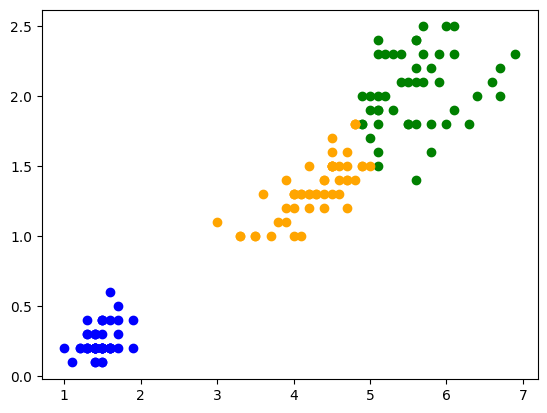

In [15]:
plt.scatter(df9a['petal length (cm)'],df9a['petal width (cm)'],color='blue')
plt.scatter(df9b['petal length (cm)'],df9b['petal width (cm)'],color='green')
plt.scatter(df9c['petal length (cm)'],df9c['petal width (cm)'],color='orange')

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df9)
    sse.append(km.inertia_)

C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ratna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

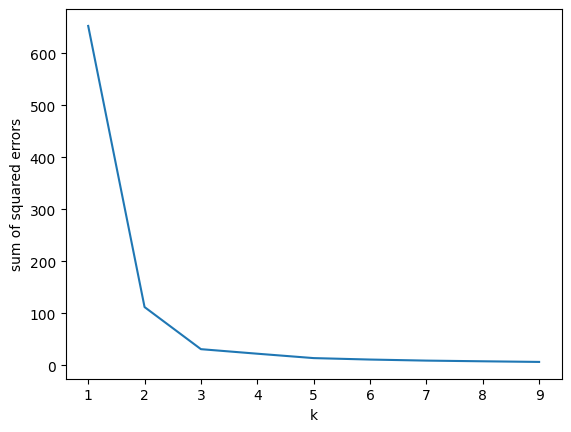

In [18]:
plt.xlabel('k')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
df10=pd.DataFrame(wine.data,columns=wine.feature_names)
df10

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
df10['target']=wine.target
df10

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df10.drop(['target'],axis=1),df10['target'],test_size=0.2)

In [9]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [10]:
model.fit(X_train,y_train)

GaussianNB()

In [11]:
len(X_test)

36

In [12]:
X_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.070,2.75,1060.0
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.110,4.00,1035.0
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.880,3.35,885.0
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.860,3.02,312.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.150,3.30,290.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.810,1.82,580.0
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.100,2.31,434.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.240,3.37,1265.0
89,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.070,3.21,625.0


In [13]:
model.score(X_test,y_test)

1.0

In [14]:
y_test

48     0
22     0
44     0
70     1
108    1
93     1
138    2
113    1
51     0
89     1
158    2
0      0
24     0
124    1
164    2
53     0
88     1
142    2
56     0
45     0
104    1
74     1
41     0
20     0
66     1
167    2
76     1
86     1
32     0
173    2
175    2
144    2
50     0
12     0
17     0
67     1
Name: target, dtype: int32

In [15]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1])

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [20]:
model.fit(X_train,y_train)

MultinomialNB()

In [21]:
model.score(X_test,y_test)

0.8055555555555556

In [22]:
y_test

48     0
22     0
44     0
70     1
108    1
93     1
138    2
113    1
51     0
89     1
158    2
0      0
24     0
124    1
164    2
53     0
88     1
142    2
56     0
45     0
104    1
74     1
41     0
20     0
66     1
167    2
76     1
86     1
32     0
173    2
175    2
144    2
50     0
12     0
17     0
67     1
Name: target, dtype: int32

In [23]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1])

In [2]:
from sklearn import datasets
digits=datasets.load_digits()

In [3]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,50,100],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,12,20]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [7]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.933794,{'n_estimators': 30}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.811925,{'criterion': 'entropy'}


In [4]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
df11=pd.DataFrame(digits.data,digits.target)
df11

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [14]:
df11['target']=digits.target
df11

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df11.drop(['target'], axis=1), df11['target'], test_size=0.2)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
knn.score(X_test,y_test)

0.9833333333333333

In [16]:
from sklearn.metrics import confusion_matrix
y_predict=knn.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 38]], dtype=int64)

In [18]:
!pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.6 kB 653.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.6 kB 744.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 654.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.6 kB 807.1 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.6 kB 860.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.6 kB 883.3 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 908.4 kB/s eta 0:00:00


Text(58.222222222222214, 0.5, 'Truth')

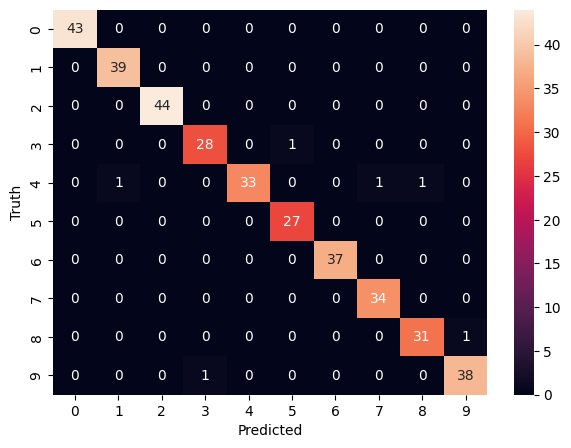

In [19]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        44
           3       0.97      0.97      0.97        29
           4       1.00      0.92      0.96        36
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        34
           8       0.97      0.97      0.97        32
           9       0.97      0.97      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
df11

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
df11=df = pd.DataFrame(digits.data, columns=digits.feature_names)
df11

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [20]:
X=df11.drop(['target'],axis=1)
y=df11.target

In [21]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [22]:
pca.n_components

0.95

In [23]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.9694444444444444

In [28]:

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [15]:
df13=pd.read_csv('heart.csv')
df13

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df13.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
dummy1=pd.get_dummies(df13['ChestPainType'])
dummy2=pd.get_dummies(df13['RestingECG'])
dummy3=pd.get_dummies(df13['ExerciseAngina'])

dummy1
dummy2
dummy3


,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,0,1
916,1,0


In [18]:
df13=pd.concat([df13,dummy1,dummy2,dummy3],axis=1)
df13

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,1,0,0,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,1,0,0,0,0,1,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,1,1,0,0,0,0,1,0,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,...,1,0,0,0,1,0,1,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,...,1,1,0,0,0,0,1,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,...,1,1,0,0,0,0,1,0,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,...,1,0,1,0,0,1,0,0,1,0


In [19]:
df13=df13.drop(['ChestPainType','RestingECG','ExerciseAngina'],axis=1)
df13

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,M,140,289,0,172,0.0,Up,0,0,1,0,0,0,1,0,1,0
1,49,F,160,180,0,156,1.0,Flat,1,0,0,1,0,0,1,0,1,0
2,37,M,130,283,0,98,0.0,Up,0,0,1,0,0,0,0,1,1,0
3,48,F,138,214,0,108,1.5,Flat,1,1,0,0,0,0,1,0,0,1
4,54,M,150,195,0,122,0.0,Up,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1.2,Flat,1,0,0,0,1,0,1,0,1,0
914,68,M,144,193,1,141,3.4,Flat,1,1,0,0,0,0,1,0,1,0
915,57,M,130,131,0,115,1.2,Flat,1,1,0,0,0,0,1,0,0,1
916,57,F,130,236,0,174,0.0,Flat,1,0,1,0,0,1,0,0,1,0


In [21]:
dummy4=pd.get_dummies(df13['Sex'])
df13=pd.concat([df13,dummy4],axis=1)
df13=df13.drop(['Sex'],axis=1)
df13

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,F,M
0,40,140,289,0,172,0.0,Up,0,0,1,0,0,0,1,0,1,0,0,1
1,49,160,180,0,156,1.0,Flat,1,0,0,1,0,0,1,0,1,0,1,0
2,37,130,283,0,98,0.0,Up,0,0,1,0,0,0,0,1,1,0,0,1
3,48,138,214,0,108,1.5,Flat,1,1,0,0,0,0,1,0,0,1,1,0
4,54,150,195,0,122,0.0,Up,0,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,Flat,1,0,0,0,1,0,1,0,1,0,0,1
914,68,144,193,1,141,3.4,Flat,1,1,0,0,0,0,1,0,1,0,0,1
915,57,130,131,0,115,1.2,Flat,1,1,0,0,0,0,1,0,0,1,0,1
916,57,130,236,0,174,0.0,Flat,1,0,1,0,0,1,0,0,1,0,1,0


In [22]:

dummy6 = pd.get_dummies(df13['ST_Slope'])
df13 = pd.concat([df13, dummy6], axis=1)
df13 = df13.drop(['ST_Slope'], axis=1)
df13

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,...,LVH,Normal,ST,N,Y,F,M,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,...,0,1,0,0,1,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,...,0,1,0,0,1,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [23]:
X = df13.drop("HeartDisease",axis=1)
y = df13.HeartDisease
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_train=train_test_split(X,y,test_size=0.2)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.75      , 0.76630435, 0.79891304, 0.75956284, 0.65027322])

In [33]:
scores.mean()

0.7450106913756236

In [28]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (734, 20)
y_train shape: (184,)
X_test shape: (184, 20)
y_test shape: (734,)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# Assuming you have already defined X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the BaggingClassifier
bag_model = BaggingClassifier()
bag_model.fit(X_train, y_train)

# Make predictions
predictions = bag_model.predict(X_test)

# Evaluate the model
accuracy = bag_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8097826086956522


In [34]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.825623663578047